# Evoluční algoritmy

Zkusíme si naprogramovat jednoduchý genetický algoritmus pro problém OneMAX. OneMAX je úloha, kdy chceme, aby jedinec zapsaný jako binární řetězec obsahovel co nejvíce jedniček.

In [404]:
import numpy as np
import random
import copy
%matplotlib inline
import matplotlib.pyplot as plt

Nejprve si napíšeme funkci, co vytvoří náhodnou populaci jedinců velikosti *population_size*, kde každý jedince bude mít velikost *individual_size*.

In [416]:
def random_population(population_size, individual_size):
    population = []
    
    for i in range(0,population_size):
        individual = np.random.choice([0, 1], size=(individual_size,), p=[1/2, 1/2])
        population.append(individual)
        
    return population

Pro každou úlohu řešenou evolučním algoritmem je důležité správně definovat fitness funkci, která bude říkat, jak moc jsou jedinci dobří vzhledem k populaci a kterou se bude algoritmus snažit maximalizovat. Pro OneMAX problém bude ideální fitness funkce počet jedniček v jedinci.

In [423]:
def fitness(individual):
    return sum(individual)

Dále si napíšeme funkci, která bude dělat selekci jedinců. Použijeme ruletovou selekci, tedy každému jedinci přiřadíme výseč rulety úměrnou jeho fitness a z ní pak náhodně vybíráme jedince, kde lepší jedinci mají větší šanci být vybráni. Naštěstí knihovna random obsahuje funkci choices, která toto umí a nemusíme si to psát sami (jupí!).

In [418]:
def selection(population,fitness_value):
    return copy.deepcopy(random.choices(population, weights=fitness_value, k=len(population))) 

Máme vybrané dvojice jedinců, tak na nich provedeme křížení. Budeme dělat jednobodové křížení, teda si náhodně zvolíme bod v jedinci a hodnoty před tímto bodem vezmeme z jednoho rodiče a hodnoty po tomto bodu z druhého.

In [419]:
def crossover(population,cross_prob=1):
    new_population = []
    
    for i in range(0,len(population)//2):
        indiv1 = copy.deepcopy(population[2*i])
        indiv2 = copy.deepcopy(population[2*i+1])
        if random.random()<cross_prob:
            # zvolime index krizeni nahodne
            crossover_point = random.randint(0, len(indiv1)) 
            end2 = indiv2[:crossover_point]
            indiv2[:crossover_point] = indiv1[:crossover_point]
            indiv1[:crossover_point] = end2

        new_population.append(indiv1)
        new_population.append(indiv2)
        
    return new_population

Povedlo se nám vytvořit nové jedince pomocí křížení jejich rodičů. Následně na každém z nich provedeme mutaci tak, že si u každého bitu náhodně hodíme kostkou a s malou pravděpodobností ho změníme. 

In [424]:
def mutation(population,indiv_mutation_prob=0.1,bit_mutation_prob=0.2):
    new_population = []
    
    for i in range(0,len(population)):
        individual = copy.deepcopy(population[i])
        if  random.random()< indiv_mutation_prob:
            for j in range(0,len(individual)):
                if random.random() < bit_mutation_prob:
                    if individual[j]==1:
                        individual[j] = 0
                    else:
                        individual[j] = 1
                        
        new_population.append(individual)
        
    return new_population

Když už tedy máme napsané všechny funkce potřebné pro genetické algoritmus pro tento úkoů, můžeme se zkusit podívat, jak by vypadal jeden krok evoluce.

In [425]:
# vytvorime si nahodnou pocatecni populaci 
population = random_population(6,8)
print('Random population:')
print(np.array(population))

fitness_value = list(map(fitness, population))
selected_population = selection(population,fitness_value)
print('Population after selection:')
print(np.array(selected_population))

cross_population = crossover(selected_population)
print('Population after crossover:')
print(np.array(cross_population))

mutated_population = mutation(cross_population)
print('Population after mutation:')
print(np.array(mutated_population))

Random population:
[[1 1 1 1 1 0 0 0]
 [1 0 0 0 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [1 0 0 0 0 1 0 0]
 [1 1 0 0 1 0 1 0]
 [0 1 0 0 1 0 1 1]]
Population after selection:
[[1 1 1 1 1 0 0 0]
 [1 0 0 0 0 1 0 1]
 [1 1 1 1 1 0 0 0]
 [1 1 0 0 1 0 1 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]]
Population after crossover:
[[1 1 1 1 1 0 0 0]
 [1 1 1 1 0 1 0 1]
 [1 1 1 1 1 0 0 0]
 [1 1 0 0 1 0 1 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]]
Population after mutation:
[[1 1 1 1 1 0 0 0]
 [1 1 1 0 0 1 1 1]
 [0 1 1 1 1 0 1 0]
 [1 1 0 0 1 0 1 0]
 [1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0]]


Vidíme, že nám jednotlivé kroky fungují (další jupí!), takže je na závěr spojíme do jednoho parádního genetického algoritmu, kde si tedy vytvoříme počáteční náhodnou populaci a v několika epochách budem vždy vytvářet novou populaci z té staré pomocí selekce, křížení a mutace.

In [426]:
def evolution(population_size, individual_size, max_generations):
    max_fitness = []
    population = random_population(population_size,individual_size)
    
    for i in range(0,max_generations):
        fitness_value = list(map(fitness, population))
        max_fitness.append(max(fitness_value))
        parents = selection(population,fitness_value)
        children = crossover(parents)
        mutated_children = mutation(children)
        population = mutated_children
        
    # spocitame fitness i pro posledni populaci
    fitness_value = list(map(fitness, population))
    max_fitness.append(max(fitness_value))
    best_individual = population[max(fitness_value)]
    print(max_fitness)
    
    return best_individual, population, max_fitness

Na závěr tedy zkusíme náš krásný genetický algoritmus na OneMAX problém pustit a uvidíme, co se bude dít.

[33, 33, 32, 33, 33, 33, 35, 35, 35, 37, 37, 37, 36, 36, 36, 36, 36, 37, 38, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 40, 40, 40, 39, 42, 42, 39, 38, 38, 40, 41, 41, 42, 42, 43, 43, 43, 43, 43, 43, 43, 40, 40, 40, 40, 40, 40, 40, 40, 39, 40, 39, 39, 39, 42, 43, 43, 42, 43, 42, 41, 43, 43, 43, 43, 43, 43, 43, 44, 42, 42, 42, 42, 42, 42, 43, 43, 44, 42, 43, 44, 44, 43, 45, 45, 44, 46, 46, 46, 46, 44, 44]
best fitness:  35
best individual:  [1 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0
 0 1 1 1 1 1 1 1 1 1 0 1 1]


Text(0.5,0,'Generace')

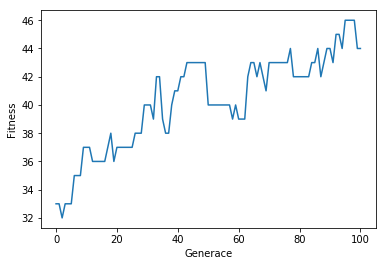

In [433]:
best, population, max_fitness = evolution(population_size=100,individual_size=50,max_generations=100)

print('best fitness: ', fitness(best))
print('best individual: ', best)


plt.plot(max_fitness)
plt.ylabel('Fitness')
plt.xlabel('Generace')


# Úkol na cvičení

Vaším úkolem bude upravit výše napsaný algoritmus tak, aby uměl vyřešit problém součtu podmnožiny, který spočívá v nalezení podmnožiny dané množiny takové, že součet prvků v té nalezené podmnožine se rovná nějakému přesně zadanému číslu. V optimalizační verzi se tedy tento problém snaží minimalizovat rozdíl mezi zadanou hodnotou a součtem podmnožiny.

In [432]:
random_set = []
for i in range(0,100):
    random_set.append(random.randint(100,150)) 
    
# for cyklus vvyse se da napsat i v jednom prikazu
random_set = [random.randint(100,150) for i in range(0,100)]
    
value = sum(random_set)//2
print(value, random_set)

6213 [107, 102, 146, 109, 140, 121, 149, 123, 106, 134, 119, 125, 130, 126, 115, 145, 140, 143, 104, 148, 126, 150, 150, 109, 118, 139, 101, 109, 133, 135, 107, 149, 107, 144, 137, 150, 136, 135, 109, 142, 109, 117, 122, 112, 148, 101, 115, 109, 117, 120, 101, 106, 131, 104, 118, 122, 101, 110, 124, 125, 103, 114, 137, 148, 140, 109, 126, 148, 113, 111, 118, 108, 121, 130, 118, 134, 119, 140, 116, 120, 123, 141, 137, 104, 112, 122, 134, 116, 103, 148, 135, 123, 143, 139, 109, 148, 143, 110, 115, 118]
